In [1]:
# Importing Important Libraries

import pandas as pd
import numpy as np

# visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid Warnings
import warnings 
warnings.filterwarnings('ignore')

# To print all rows and columns
from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



### Data Collection :

In [2]:
df = pd.read_csv('Pune_House_Data (1).csv')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


### Data Preprocessing :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=13320, step=1)

In [7]:
df.axes

[RangeIndex(start=0, stop=13320, step=1),
 Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
        'balcony', 'price', 'site_location'],
       dtype='object')]

In [8]:
df.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [10]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

### size :

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df['size'].nunique()

31

In [14]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [16]:
df['size'].dtypes

dtype('O')

In [15]:
df['size'].isna().sum()

16

In [17]:
mode = df['size'].mode()[0]
mode


'2 BHK'

In [18]:
df['size'].fillna(mode,inplace = True)

In [19]:
df['size'].isna().sum()

0

### bath :

In [20]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [21]:
df['bath'].nunique()

19

In [22]:
df['bath'].value_counts()


2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [23]:
df['bath'].dtypes

dtype('float64')

In [24]:
df['bath'].isna().sum()

73

In [25]:
mean = df['bath'].mean()
mean

2.6926096474673513

In [26]:
df['bath'].fillna(mean,inplace = True)

In [27]:
df['bath'].isna().sum()

0

### society :

In [28]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [29]:
df['society'].nunique()

2688

In [30]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
Prtanha    51
Bhmesy     51
Prityel    50
PrityTr    49
Prarkun    49
Dhalsh     47
IBityin    45
SNity S    40
Soresea    39
Adeatlm    37
Soitya     36
Rosha I    35
Bhe 2ko    35
SunceEs    34
SNnia E    33
JRrnauv    30
MenueNo    29
Prlla C    28
PuandHi    28
RothaVa    27
Prncyrn    27
GoAirej    26
Aklia R    26
Raard B    26
PhestOn    26
Puachal    26
DLhtsnd    24
Dieldli    24
Itelaa     24
Soazak     24
Sodgere    23
ViistLa    23
Brnia G    23
PualeSk    23
Shitt S    23
Soiewre    22
Prrtht     21
DLhtsan    21
RInceeg    21
Brway G    21
SoechHa    21
DLhtsen    20
AsastDe    20
Eladero    20
Shthi S    20
Prersis    19
Magiaya    19
Jaades     19
Klark L    19
PueraRi    18
Brica E    17
SSestth    17
SaireSa    17
Oreldhi    17
Prensya    16
KHatsFl    16
Baowsig    16
SSthamh    16
Sariaat    15
BrlisCo    15
NRosete    15
Sosisic    15
GolusLi    15
Tavenew    14
Taonte     14
PuziaVe    14
BriumM

In [31]:
df['society'].dtypes

dtype('O')

In [32]:
df['society'].isna().sum()

5502

In [34]:
mode = df['society'].mode()[0]
mode

'GrrvaGr'

In [36]:
df['society'].fillna(mode,inplace = True)

In [37]:
df['society'].isna().sum()

0

### balcony :

In [38]:
df['balcony'].unique()

array(['Coomee ', 'Theanmp', 'GrrvaGr', ..., 'SJovest', 'ThhtsV ',
       'RSntsAp'], dtype=object)

In [39]:
df['balcony'].nunique()

4

In [40]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [41]:
df['balcony'].dtypes

dtype('float64')

In [42]:
df['balcony'].isna().sum()

609

In [43]:
med = df['balcony'].median()
med

2.0

In [44]:
df['balcony'].fillna(med,inplace = True)

In [45]:
df['balcony'].isna().sum()

0

### site_location :

In [46]:
df['site_location'].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [47]:
df['site_location'].nunique()

97

In [48]:
df['site_location'].value_counts()

Alandi Road                   139
Kalyani Nagar                 139
Mahatma Gandhi Road           139
Lulla Nagar                   139
Laxmi Road                    139
Law College Road              139
Ambegaon Budruk               139
Koregaon Park                 139
Kondhwa Khurd                 139
Kondhwa Budruk                139
Kondhwa                       139
Kharadi                       139
Khadki                        139
Khadaki                       139
Katraj                        139
Kasba Peth                    139
Karve Road                    139
Mangalwar peth                139
Manik Bagh                    139
Market yard                   139
Padmavati                     139
Pune Railway Station          139
Prabhat Road                  139
Pirangut                      139
Paud Road                     139
Pashan                        139
Parvati Darshan               139
Navi Peth                     139
Model colony                  139
Narayangaon   

In [50]:
df['site_location'].dtypes

dtype('O')

In [49]:
df['site_location'].isna().sum()

1

In [51]:
mod = df['site_location'].mode()[0]
mod

'Alandi Road'

In [52]:
df['site_location'].fillna(mod,inplace = True)

In [53]:
df['site_location'].isna().sum()

0

In [54]:
df.isna().sum()

area_type        0
availability     0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [ ]:
# All the missing values are successfully removed 

### Data Visualization :

<Axes: xlabel='bath', ylabel='Count'>

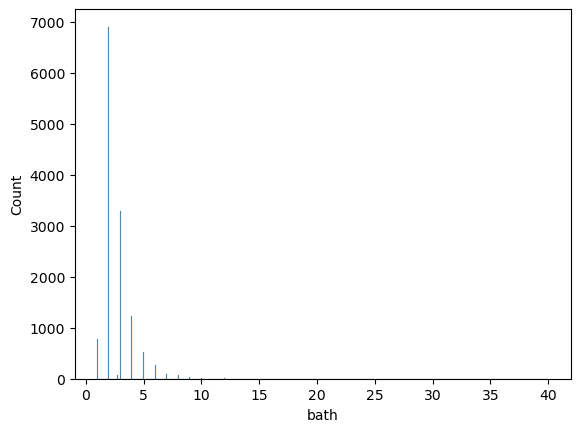

In [55]:
sns.histplot(df['bath'])

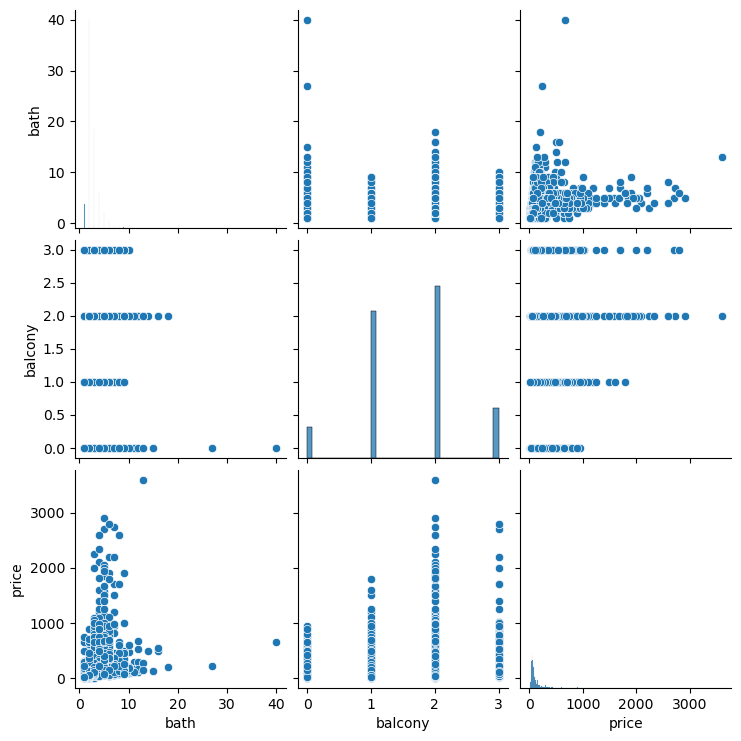

In [56]:
sns.pairplot(df)

In [ ]:
# There are no Missing values in the dataset

## Handling Outliers :

In [57]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

<Axes: >

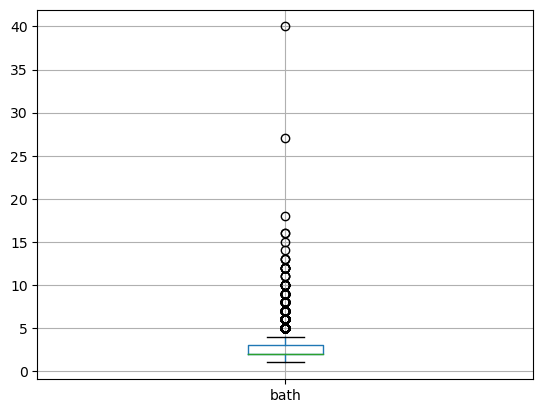

In [58]:
df[['bath']].boxplot()

In [59]:
q1 = df['bath'].quantile(0.25)
q3 = df['bath'].quantile(0.75)

median = df['bath'].median()
IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q3 - 1.5 * IQR

print('First Quantile : ',q1)
print('Third Quantile : ',q3)

print('IQR :-->',IQR)

print('Upper_tail :-->',upper_tail)
print('Lower tail:',lower_tail)



First Quantile :  2.0
Third Quantile :  3.0
IQR :--> 1.0
Upper_tail :--> 4.5
Lower tail: 1.5


In [60]:
df['bath'].loc[df['bath']> upper_tail]

1         5.0
9         6.0
11        5.0
22        5.0
45        9.0
62        5.0
64        8.0
68        7.0
79        6.0
84        5.0
85        7.0
89        6.0
129       7.0
140       8.0
141       5.0
145       7.0
149       5.0
170       6.0
192       5.0
193       7.0
209       6.0
216       6.0
238       5.0
241       8.0
258       5.0
282       6.0
315       5.0
337       6.0
358       5.0
370       5.0
408       6.0
413       7.0
425       5.0
434       8.0
459       9.0
483       5.0
490       7.0
516       5.0
518       5.0
524       6.0
538       9.0
547       5.0
550       5.0
554       6.0
605       7.0
609       5.0
610       5.0
615       5.0
639       5.0
648       9.0
656       5.0
677       7.0
679       5.0
736       5.0
749       5.0
770       9.0
783       7.0
838       6.0
885       6.0
888       5.0
889       5.0
928       5.0
935       5.0
938      11.0
950       5.0
953       5.0
991       6.0
1018      7.0
1024      7.0
1033      5.0
1038      5.0
1044  

In [61]:
df['bath'].loc[df['bath'] > upper_tail] = upper_tail

In [62]:
df['bath'].loc[df['bath'] > upper_tail]

Series([], Name: bath, dtype: float64)

<Axes: >

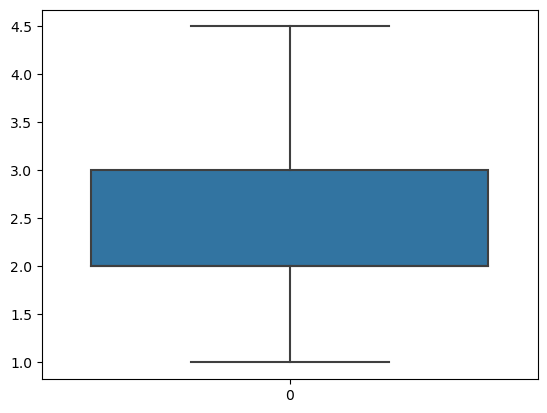

In [63]:
sns.boxplot(df['bath'])

## Groupby function :

In [64]:
df.groupby('bath').first().head()

,area_type,availability,size,society,total_sqft,balcony,price,site_location
bath,,,,,,,,
1.00000,Built-up Area,Ready To Move,1 BHK,GrrvaGr,600,1.0,15.00,Dhayari Phata
2.00000,Super built-up Area,19-Dec,2 BHK,Coomee,1056,1.0,39.07,Alandi Road
2.69261,Built-up Area,20-Feb,4 Bedroom,BrereAt,3010 - 3410,2.0,192.00,Model colony
3.00000,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,1.0,95.00,Aundh
4.00000,Super built-up Area,18-May,4 BHK,Jaades,2732,2.0,204.00,Baner


## Crosstab Function :

In [65]:
pd.crosstab(df['bath'],df['availability']).head()

availability,14-Jul,14-Nov,15-Aug,15-Dec,15-Jun,15-Nov,15-Oct,16-Dec,16-Jan,16-Jul,16-Mar,16-Nov,16-Oct,16-Sep,17-Apr,17-Aug,17-Dec,17-Feb,17-Jan,17-Jul,17-Jun,17-Mar,17-May,17-Nov,17-Oct,17-Sep,18-Apr,18-Aug,18-Dec,18-Feb,18-Jan,18-Jul,18-Jun,18-Mar,18-May,18-Nov,18-Oct,18-Sep,19-Apr,19-Aug,19-Dec,19-Feb,19-Jan,19-Jul,19-Jun,19-Mar,19-May,19-Nov,19-Oct,19-Sep,20-Apr,20-Aug,20-Dec,20-Feb,20-Jan,20-Jul,20-Jun,20-Mar,20-May,20-Nov,20-Oct,20-Sep,21-Aug,21-Dec,21-Feb,21-Jan,21-Jul,21-Jun,21-Mar,21-May,21-Nov,21-Oct,21-Sep,22-Dec,22-Jan,22-Jun,22-Mar,22-May,22-Nov,Immediate Possession,Ready To Move
bath,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,2,18,11,10,2,7,9,9,9,13,8,0,5,0,2,32,0,8,1,3,10,0,1,2,2,1,6,15,0,6,0,1,0,0,0,0,1,0,17,1,3,0,4,2,0,1,2,0,1,1,0,1,0,0,0,556
2.00000,1,0,1,1,1,0,0,0,0,1,2,1,1,0,4,4,15,1,0,6,9,4,4,8,12,6,159,138,153,30,17,76,63,60,173,26,25,26,13,10,72,2,10,24,8,42,2,5,7,7,1,7,45,0,12,0,4,1,1,2,5,3,4,39,0,5,4,5,6,4,1,2,5,6,3,11,2,1,0,0,5499
2.69261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,10,0,0,1,3,6,4,0,1,1,0,0,2,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,16,16
3.00000,0,1,0,0,0,2,1,2,0,0,0,0,0,2,2,3,6,0,0,5,3,1,2,2,8,2,62,42,85,13,14,40,18,33,67,10,9,8,2,2,54,1,12,11,15,26,3,1,3,9,1,2,30,1,6,3,6,1,0,2,2,1,1,30,5,4,4,8,6,8,1,2,1,4,2,8,0,3,2,0,2560
4.00000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,1,0,14,8,32,7,2,11,3,13,27,3,2,1,1,1,16,0,2,0,9,6,3,0,3,1,0,1,5,0,0,1,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1041


## Feature Selection :

### i) Linearity :

In [66]:
r = df.corr()[['bath']]
r

,bath
bath,1.000000
balcony,0.272198
price,0.487409


<Axes: >

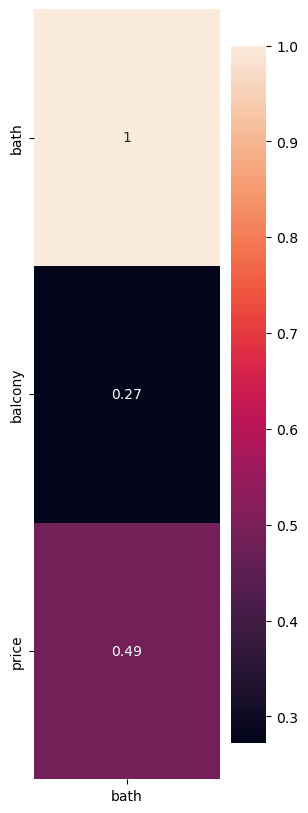

In [67]:
plt.figure(figsize = (3,10))
sns.heatmap(r,annot = True)

### ii) Multicollinearity :

In [68]:
df1 = df.drop('bath',axis = 1)
df1.head()

,area_type,availability,size,society,total_sqft,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,GrrvaGr,1440,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,1.0,51.00,Aundh Road


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model Building :

In [31]:
from sklearn.linear_model import LinearRegression

In [39]:
x = df.drop('bath',axis = 1)
y = df['bath']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 , random_state = 42)

In [35]:
model = LinearRegression()